In [31]:
l1 = [6,2,5,4,9,7,2,1,5,9]
l2 = []
num = 0 
for i in range(len(l1)) : 
    if num == len(l1)-1: 
        break 
    elif l1[num] > l1[num+1]: 
        l2.append(l1[num])  
    num += 1 
l2.append(l1[-1])

     

print(l1)
print(l2)


[6, 2, 5, 4, 9, 7, 2, 1, 5, 9]
[6, 5, 9, 7, 2, 9]


In [73]:
# class defination 
class Node : 
    def __init__(self , data:list): 
        self.data = data 
        self.next = None 

    def DeleteNodes(self)->list: 
        l2 = []
        num = 0 
        for i in range(len(self.data)) : 
            if num == len(self.data)-1: 
                break 
            elif self.data[num] > self.data[num+1]: 
                l2.append(self.data[num])  
            num += 1 
        l2.append(self.data[-1])
        return l2 

# driver code 
node = Node(data=[6, 2, 5, 4, 9, 7, 2, 1, 5, 9])
node.DeleteNodes()

[6, 5, 9, 7, 2, 9]

In [37]:
str = "whereabouts"
v = ['a','e','i','o','u']
vowel_list = []
conso_list = []
out_conso = []
out_vow = []
for i in str : 
    vow = False 
    conso = False
    if i not in v : 
        conso_list.append(i)
        conso = True 
        if conso == True :
            out_conso.append("C")
    else : 
        vowel_list.append(i)
        vow = True 
        if vow == True : 
            out_vow.append("V")
    

     


print(vowel_list)
print(conso_list)
print(out_vow , out_conso , end = ' ')

['e', 'e', 'a', 'o', 'u']
['w', 'h', 'r', 'b', 't', 's']
['V', 'V', 'V', 'V', 'V'] ['C', 'C', 'C', 'C', 'C', 'C'] 

In [75]:

def VowelConsonentSequence(str1:str): 
    v = ['a','e','i','o','u']
    def isvow(v,alpha) : 
        if alpha in v : 
            return True 
        else : 
            return False  
    def conso_vow(): 
        out = []
        for i in range(len(str1)) : 
            if isvow(v,alpha=str1[i]): 
                out.append("V")
            else : 
                out.append("C")
        return out 
    l2 = conso_vow()
    num  = 0 
    for i in range(len(l2)) : 
        if l2[i] == l2[i+1]  : 
            l2.pop(i)
            if num == len(l2)-1:   
                break 
        num += 1 

    return ('').join(l2)
    
str1 = "yoghurt"

VowelConsonentSequence(str1=str1)
         

'CVCVC'

In [78]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\manev\Desktop\iNeuron\dataset\housing.csv")


In [79]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [80]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [82]:
from housing.component.data_transformation import FeatureGenerator 

In [85]:
featuregen = FeatureGenerator()


In [100]:
num_column = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'
       ]
cat_column = ['ocean_proximity']

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # we can create seperate pipeline for cat anad num columns and at the end we can combine them 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [110]:
num_pipeline = Pipeline(steps= [
    ('imputer' , SimpleImputer(strategy="median")),
    ('feature_generator', FeatureGenerator()),
    ('scaling' , StandardScaler(with_mean=False))
]
)

In [112]:
cat_pipeline = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='most_frequent')),
    ("oneHotEncoder", OneHotEncoder()),
    ('scaling' , StandardScaler(with_mean=False))

])

In [113]:
preprocessing = ColumnTransformer([
    ('num_pipeline' , num_pipeline,num_column),
    ('cat_pipeline',cat_pipeline,cat_column)]
)

In [108]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [116]:
df_new = preprocessing.fit_transform(df)

In [123]:
pd.DataFrame(df_new).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-61.008748,17.734907,3.257781,0.403381,0.307596,0.284343,0.329566,4.382202,2.822881,0.246063,2.246721,0.0,0.0,0.0,3.184006,0.0
1,-61.003756,17.725544,1.668620,3.254090,2.637216,2.120211,2.976560,4.369674,2.521363,0.203147,2.387812,0.0,0.0,0.0,3.184006,0.0
2,-61.013739,17.720862,4.131820,0.672454,0.453048,0.437994,0.462962,3.820135,3.349942,0.269817,1.985024,0.0,0.0,0.0,3.184006,0.0
3,-61.018730,17.720862,4.131820,0.583985,0.560349,0.492744,0.572818,2.970403,2.351288,0.245330,2.827097,0.0,0.0,0.0,3.184006,0.0
4,-61.018730,17.720862,4.131820,0.745796,0.667650,0.498925,0.677442,2.024555,2.539032,0.210043,2.637623,0.0,0.0,0.0,3.184006,0.0


In [132]:
import numpy as np 
x = df_new
y = np.array(df.median_house_value)

In [133]:
from sklearn.linear_model import LinearRegression 
linear = LinearRegression()
linear.fit(x,y)
linear.coef_

array([-5.53207224e+04, -5.62551518e+04,  1.33647399e+04, -1.88243503e+03,
        7.46525272e+03, -4.63319694e+04,  4.57523727e+04,  7.47913188e+04,
        6.37210030e+03,  8.63339993e+02,  9.61321942e+03,  7.60997774e+11,
        7.13139970e+11,  2.38434001e+10,  4.81190095e+11,  5.13189062e+11])

In [134]:
linear.intercept_

-1532114676613.789

In [135]:
y_hat = linear.predict(x)

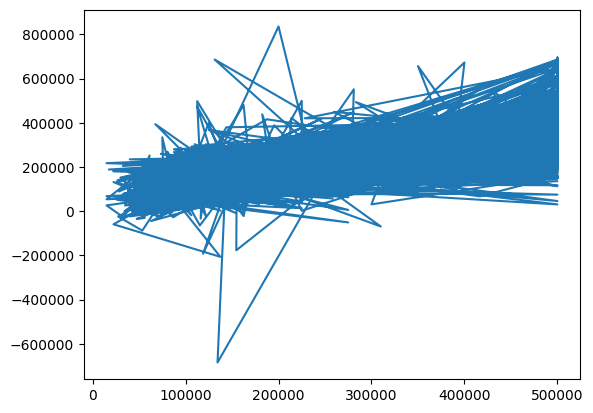

In [139]:
import matplotlib.pyplot as plt
plt.plot(y,y_hat )

In [137]:
from sklearn.metrics import r2_score
r2_score(y,y_hat)

0.6498070697258065